# Cellohood Cluster Selection Example

In this notebook we will show how to use Cellohood Cluster Selection package. We will:

1. Generate the artificial data,
2. We will run the Cellohood Cluster Selection algorithm on this data,
3. Present the results.

Let us start with appropriate imports:

In [1]:
import matplotlib.pyplot as plt
import numpy

import ccs

## 1. Artificial data creation

In this part we will create a _cross_ data consisting of a mixture of 5 Gaussian following a _cross-like_ structure:

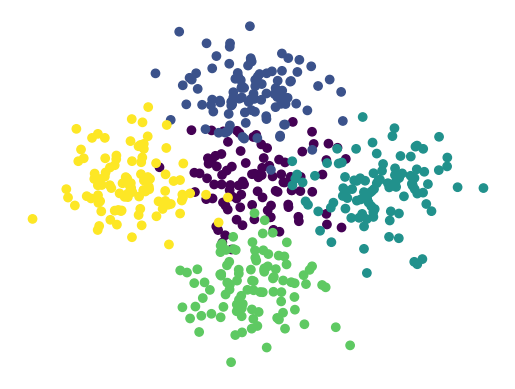

In [2]:
numpy.random.seed(0)


TEST_CLUSTERS_SIGMA = 0.3
NB_OF_SAMPLES_PER_CLUSTER = 100

means = numpy.array(
    [
        [0, 0],
        [0, 1],
        [1, 0],
        [0, -1],
        [-1, 0],
    ]
)
samples = numpy.vstack(
    [
        numpy.random.normal(
            loc=numpy.array(mean), 
            scale=TEST_CLUSTERS_SIGMA, 
            size=(NB_OF_SAMPLES_PER_CLUSTER, 2),
        )
        for mean in means
    ]
)  

samples_colors = []

for i in range(5):
    samples_colors.extend([i] * NB_OF_SAMPLES_PER_CLUSTER)


plt.scatter(
    samples[:, 0], 
    samples[:, 1], 
    c=samples_colors,
)
_ = plt.axis('off')

## 2. Running Cellohood Cluster Selection:

The main function that is used for Cellohood Cluster Selection is `ccs.cellohood_cluster_selection`. It accepts the following arguments:
- `x: numpy.array` - a 2-dimensional data that will be clustered,
- `clusters_to_analyze: Optional[List]` - a consecutive list of number of clusters to be analyzed. Keep in mind that the extreme elements in this list will be dropped, as we are looking for a local maxima of cross-cluster FMSes,
- `nb_of_tries_per_cluster_nb: int = 5` - number of tries per every number of clusters tested,
- `take_every_example_for_training: int = 5` - downsampling ratio (every `take_every_example_for_training` will be taken to fit the clusters),
- `first_random_state: int = 42` - for sake of reproducibility, every consecutive clusterer trained during the cluster selection process has a random state assigned. After a successful fitting of a clusterer we are increasing the random state of the next clusterer by 1. This random state is assigned to the first clusterer.

This function results a named `CCSResult` named tuple with fields:
- `best_clusterers` - dictionary with selected number of clusters as keys (there might be potentially many of them) and `KMeans` clusters assigned to a given number of clusters as values,
- `cluster_nb_to_k_means` - dictionary with tested number of clusters as keys and all fitted clusters as values
- `cluster_nb_to_predictions` - same as above but with clusters predictions,
- `cluster_nb_to_fmses` - same as above but with cross-cluster number fms scores.

One can use a handy `ccs.plot_ccs_result` function to plot results. Except of `CCSResult` one may pass `save_fig=True` and `path` in order to save a figure with a plot to the `path` provided:

In [3]:
ccs_result = ccs.cellohood_cluster_selection(
    clusters_to_analyze=range(2, 10),
    x=samples,
)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [02:40<00:00, 20.02s/it]


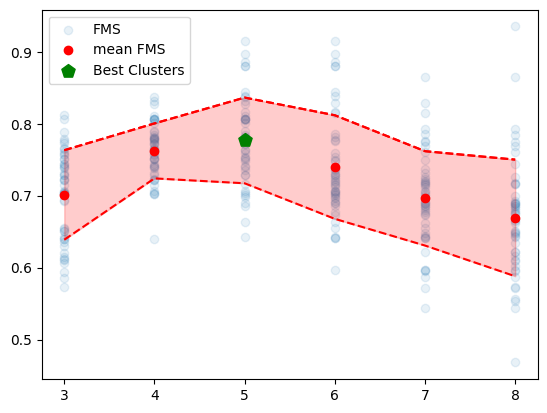

In [4]:
ccs.plot_ccs_result(ccs_result)

In the plot above we can see:
- all the `fms` scores in blue,
- mean `fms` score per number of clusters in red,
- best number of clusters in green,
- a `fms` standard deviation.

As we can see, the ground truth number of clusters (which is `5`) was selected - which is sweet!

## 3. Visualization of the results. 

Now we will showcase how to use `CCSResult` in order to plot some results. In the following code we will select the best clusterer assigned to the `5` clusters and present its results and fitted cluster means:

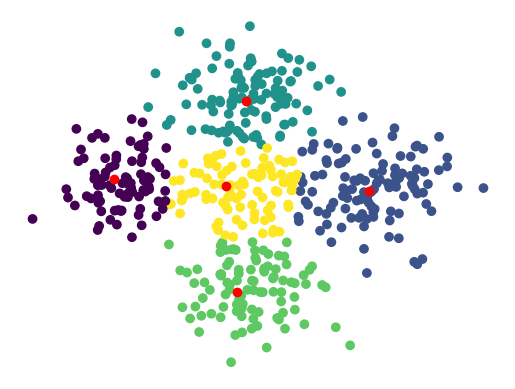

In [5]:
plt.scatter(samples[:, 0], samples[:, 1], c=ccs_result.best_clusterers[5].predict(samples))
plt.scatter(ccs_result.best_clusterers[5].cluster_centers_[:, 0], ccs_result.best_clusterers[5].cluster_centers_[:, 1], c='r')
_ = plt.axis('off')

## Next steps:

In order to save the results one can either:
- pickle the whole `CCSResult` object to keep all the information needed for plotting the results,
- pickle only `ccs_result.best_clusters` object to keep only the clusterers assigned to the selected clusters. In order to keep the cluster selection results one may save the figure with cluster selection results (as defined above).